# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '230905'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
library(data.table)
library(arrow)

In [4]:
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character"))
endpoints = sort(endpoints_md$endpoint)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [6]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401", #Hypertension"
    "phecode_404", # Ischemic heart disease
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure
    
    "phecode_059-1", # COVID 19
    
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
    
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    
    #"phecode_374-3", # Retinal vascular changes and occlusions
###  "phecode_374-42", # Diabetic retinopathy ### OBSOLETE W/O COVID DATA :( 
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    #"phecode_388" # Blindness and low vision 
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_440-3", # Pulmonary embolism
    
    "phecode_583", # Chronic kidney disease
    "phecode_542", # Chronic liver disease and sequelae
    
    "OMOP_4306655" # All-Cause Death
    
    #"phecode_468-1",	#Viral pneumonia
    
    #"phecode_460-2",	#Acute lower respiratory infection
    #"phecode_665", # Psoriasis
    #"phecode_121", # Leukemia
    #"phecode_705-1" # Rheumatoid arthritis

)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [7]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"COPD",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
               phecode_string == "Malignant neoplasm of the thoracic and respiratory organs"~"Thoracic and respiratory cancer",
               phecode_string == "Malignant neoplasm of the digestive organs"~"GI cancer",
               phecode_string == "Malignant neoplasm of the skin"~"Skin cancer",
               phecode_string == "Dementias and cerebral degeneration"~"Dementias",
               phecode_string == "Chronic liver disease and sequelae"~"Chronic liver disease",
               
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [8]:
endpoints_md %>% filter(endpoint %in% endpoint_selection) %>% as_tibble() %>% arrange(n)  %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>% mutate(perc = freq*100)

V1,endpoint,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,perc
<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
205,Parkinson's disease,61209,361,0.005897825,324.11,Parkinson's disease (Primary),Neuro,Both,0,324,1,0.5897825
14,COVID-19*,61256,535,0.008733838,059.1,COVID-19*,ID,Both,1,59,1,0.8733838
35,Thoracic and respiratory cancer,61184,654,0.010689069,102,Malignant neoplasm of the thoracic and respiratory organs,Neoplasms,Both,0,102,0,1.0689069
213,Dementias,61247,664,0.010841347,328,Dementias and cerebral degeneration,Neuro,Both,0,328,0,1.0841347
372,Ischemic stroke,61117,787,0.012876941,431.11,Cerebral infarction [Ischemic stroke],Cardio,Both,0,431,1,1.2876941
390,Pulmonary embolism,61050,850,0.013923014,440.3,Pulmonary embolism,Cardio,Both,0,440,1,1.3923014
522,Chronic liver disease,61113,940,0.015381343,542,Chronic liver disease and sequelae,GI,Both,0,542,0,1.5381343
280,Macular degeneration,61178,974,0.015920756,374.5,Macular degeneration,Eye,Both,0,374,0,1.5920756
282,Glaucoma,61107,1112,0.018197588,375.1,Glaucoma,Eye,Both,0,375,0,1.8197588


In [9]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '230905'

In [10]:
eligable_eids = arrow::read_feather(glue("{output_path}/eligable_eids_long_{today}.feather")) %>% 
    mutate(included = 1)
eligable_eids$eid = as.numeric(levels(eligable_eids$eid))[eligable_eids$eid]

Warning message:
“Coercing dictionary values to R character factor levels”


In [11]:
data_outcomes = arrow::read_feather(glue("{output_path}/baseline_outcomes_long_230905.feather", as_data_frame=FALSE)) 

In [12]:
#partitions = 0:21
partitions = c(4, 5, 7, 9, 10, 20) # Partitions with eye test centers
crop_ratio = "0.66" # 0.3, 0.5, 0.8
partitions
paths = c()
for (p in partitions){
    temp_path = glue("/sc-projects/sc-proj-ukb-cvd/results/projects/22_retina_phewas/data/{today}/loghs/ImageTraining_[]_ConvNeXt_MLPHead_predictions/{p}/test.feather")
    #temp_path = glue("{experiment_path}/loghs/ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio{crop_ratio}/{p}/test.feather")
    paths = c(paths, temp_path)
    }

[1]  4  5  7  9 10 20

In [13]:
read_predictions = function(paths, endpoint_list){
    predictions = paths %>% map_df(
        ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_list)))) %>% 
        pivot_longer(all_of(endpoint_list), names_to="endpoint", values_to="logh") %>%
        mutate(eid = as.integer(as.character(eid))) %>%
        #mutate(eid = as.character(eid)) %>%
        select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
    return(predictions)
    }

map <- c(`1` = 'top10',
            `2` = 'rest',
         `3` = 'rest',
         `4` = 'rest',
         `5` = 'rest',
         `6` = 'rest',
         `7` = 'rest',
         `8` = 'rest',
         `9` = 'rest',
         `10` = 'rest')

calc_ratios = function(pred_outcomes, endpoints_md){
    
    logh_inc = pred_outcomes %>% 
        filter(included==1) %>% 
        group_by(endpoint) %>% 
        mutate(logh_perc = ntile(logh, 10)) %>% 
#         mutate(logh_perc=case_when(logh_perc %in% 1:9 ~ 1, 
#                                     logh_perc %in% 10:11 ~ 10,
#                                     TRUE ~ "NA")) %>%
        ungroup()

    logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event, na.rm=TRUE), event_rate = mean(event)) #%>% as_tibble()
    temp_ordered = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoint_defs$endpoint)) 
    temp_ratios = temp_ordered %>% #filter(logh_perc %in% c(1, 10)) %>% 
        pivot_wider(names_from=logh_perc, values_from=c(n, event_rate)) %>% 
        mutate(event_rate_ratio=event_rate_10/event_rate_1) %>%
#             mutate(ratio=ratio_top10/ratio_rest) %>%

        #mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>%
        #select(endpoint, n_1, n_10, event_rate_1, ratio_10, ratio) %>%
#             select(endpoint, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

        arrange(event_rate_ratio) #%>% as_tibble()
    return(temp_ratios)
    }

In [14]:
prepare_ratios = function(endpoint_list){
    
    temp_outcomes = data_outcomes %>% filter(endpoint %in% endpoint_list)
    temp_eligability = eligable_eids %>% filter(endpoint %in% endpoint_list)
    temp_outcomes_eligability = temp_outcomes %>% left_join(temp_eligability, by=c("eid", "endpoint"))
    #pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, on=c(eid, endpoint)) %>% as_tibble()
    pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, by=c("eid", "endpoint")) %>% as_tibble()
    temp_df = calc_ratios(pred_outcomes, endpoints_md)
    
    return(temp_df)
    }

In [15]:
ep_chunks = split(endpoints_md$endpoint, ceiling(seq_along(endpoints_md$endpoint)/500))

In [16]:
ratio_dfs = c()
for (i in 1:length(ep_chunks)){
    endpoint_list = ep_chunks[[i]]
    ratio_dfs[[i]] = prepare_ratios(endpoint_list)
    print(ratio_dfs[[i]])
    flush.console()
}

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



# A tibble: 500 × 22
# Groups:   endpoint [500]
   endpoint         n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>          <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1 phecode_503-5     21    20    14    13    19    12    13    13    15    10
 2 phecode_503       21    23    17    15    16    15    17    17    16    11
 3 phecode_515       33    32    29    22    22    25    17    25    34    20
 4 phecode_471       72    46    46    71    45    70    48    54    72    44
 5 phecode_488-8     20    12     9     7    11    16    10     9    28    13
 6 phecode_336-55    19    15    11    14    15    11    12    16    20    13
 7 phecode_524-1    120   103    78   112   124   148   128   145    78    84
 8 phecode_524      133   106   109   120   125   143   132   162    83    99
 9 phecode_336-5     21    19    22    15    21    16    27    10    28    16
10 phecode_139-61    22    13    13    20    17    24    29    30    18    17
# … with 490 mor

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.



# A tibble: 252 × 22
# Groups:   endpoint [252]
   endpoint        n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10
   <fct>         <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1 phecode_532-1    30    16    13    15    17    20    16    10    14    14
 2 phecode_610      10     9    12     8    15    11    17    10    10     5
 3 phecode_835       9    18     6    12    14    13    11     7     9     6
 4 phecode_619-4    13    11    11    16    13    11     5     5    14     9
 5 phecode_529-2    37    43    30    35    24    29    39    44    37    26
 6 phecode_619-5    12    12    12     9    12    21    10     9    14     9
 7 phecode_614-5    16    12    13    18    17    14     9    15    16    13
 8 phecode_728      30    16    19    15    22    23    14    17    19    25
 9 phecode_613      14    13    18     7    17    17     9    16    16    12
10 phecode_674-2    15    12    10     7    12     6    11    11     8    13
# … with 242 more rows, and 

In [17]:
ratio_df_complete = bind_rows(ratio_dfs) %>% ungroup() %>%
    mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>% 
    #select(endpoint, endpoint_string, n_1, n_10, ratio_1, ratio_10, ratio) %>%
#     select(endpoint, endpoint_string, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

    arrange(event_rate_ratio) %>% left_join(endpoints_md %>% select(endpoint, n, phecode_category) %>% as_tibble(), by="endpoint")

ratio_df_complete

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,⋯,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,n,phecode_category
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>
phecode_532-1,30,16,13,15,17,20,16,10,14,⋯,0.002781869,0.003273322,0.002618658,0.0016366612,0.0022913257,0.0022913257,0.4667430,Intestinal fistula,165,GI
phecode_503-5,21,20,14,13,19,12,13,13,15,⋯,0.003107114,0.001962388,0.002125920,0.0021262676,0.0024533857,0.0016355904,0.4762684,Periapical abscess,150,GI
phecode_610,10,9,12,8,15,11,17,10,10,⋯,0.004534462,0.003325272,0.005139057,0.0030229746,0.0030229746,0.0015114873,0.5001511,Benign mammary dysplasias,107,Genitourinary
phecode_503,21,23,17,15,16,15,17,17,16,⋯,0.002617373,0.002453787,0.002780959,0.0027809586,0.0026178010,0.0017997382,0.5238952,Diseases of pulp and periapical tissues,168,GI
phecode_515,33,32,29,22,22,25,17,25,34,⋯,0.003600065,0.004090983,0.002781869,0.0040909835,0.0055637375,0.0032727868,0.6061598,Heartburn and epigastric pain,259,GI
phecode_471,72,46,46,71,45,70,48,54,72,⋯,0.007461449,0.011606699,0.007958879,0.0089537390,0.0119383187,0.0072956392,0.6112124,Other disorders of nose and nasal sinuses,568,Resp
phecode_488-8,20,12,9,7,11,16,10,9,28,⋯,0.001802097,0.002621661,0.001638538,0.0014746846,0.0045879076,0.0021301000,0.6501065,Mouth breathing*,135,Resp
phecode_835,9,18,6,12,14,13,11,7,9,⋯,0.002294706,0.002130798,0.001802983,0.0011473529,0.0014754098,0.0009836066,0.6667760,Cytology and pathology findings,105,Signs/Symptoms
phecode_336-55,19,15,11,14,15,11,12,16,20,⋯,0.002452583,0.001798561,0.001962067,0.0026160889,0.0032701112,0.0021255723,0.6843224,Lesion of plantar nerve,146,Neuro


In [18]:
options(pillar.print_max = Inf)
ratio_df_complete %>% 
    arrange(event_rate_ratio) %>% 
    #write_csv(glue("outputs/SupplTable1_RateRatiosAll_10vsRest_CropRatio-0.66.csv"))
    write_csv(glue("outputs/UKB_EventRates_PhenomeWide.csv"))

In [19]:
# 0.66:
for (t in c(1, 2, 3, 5, 10, 50)){
     n = nrow(ratio_df_complete %>% filter(event_rate_ratio > t))
     freq = round(n*100/nrow(ratio_df_complete))
     print(glue("nrows with rate ratio > {t}: {n} ({freq}%)"))
}

nrows with rate ratio > 1: 720 (96%)
nrows with rate ratio > 2: 568 (76%)
nrows with rate ratio > 3: 445 (59%)
nrows with rate ratio > 5: 282 (38%)
nrows with rate ratio > 10: 126 (17%)
nrows with rate ratio > 50: 22 (3%)


In [20]:
ratio_df_complete %>% 
    select(endpoint, endpoint_string, n, phecode_category, event_rate_ratio)%>% filter(n>50) %>% arrange(event_rate_ratio)
#%>% filter(event_rate_ratio <= 1.5) 

endpoint,endpoint_string,n,phecode_category,event_rate_ratio
<chr>,<fct>,<int>,<chr>,<dbl>
phecode_532-1,Intestinal fistula,165,GI,0.4667430
phecode_503-5,Periapical abscess,150,GI,0.4762684
phecode_610,Benign mammary dysplasias,107,Genitourinary,0.5001511
phecode_503,Diseases of pulp and periapical tissues,168,GI,0.5238952
phecode_515,Heartburn and epigastric pain,259,GI,0.6061598
phecode_471,Other disorders of nose and nasal sinuses,568,Resp,0.6112124
phecode_488-8,Mouth breathing*,135,Resp,0.6501065
phecode_835,Cytology and pathology findings,105,Signs/Symptoms,0.6667760
phecode_336-55,Lesion of plantar nerve,146,Neuro,0.6843224


In [21]:
#ratio_df_complete %>% filter(ratio<10) %>% arrange(desc(ratio_1)) #%>% filter(!str_detect(endpoint, "-"))

In [22]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

## Nice overview over all categories

### crop ratio 0.3

### crop ratio 0.5 with only positive ratios (negative set to 0)

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”


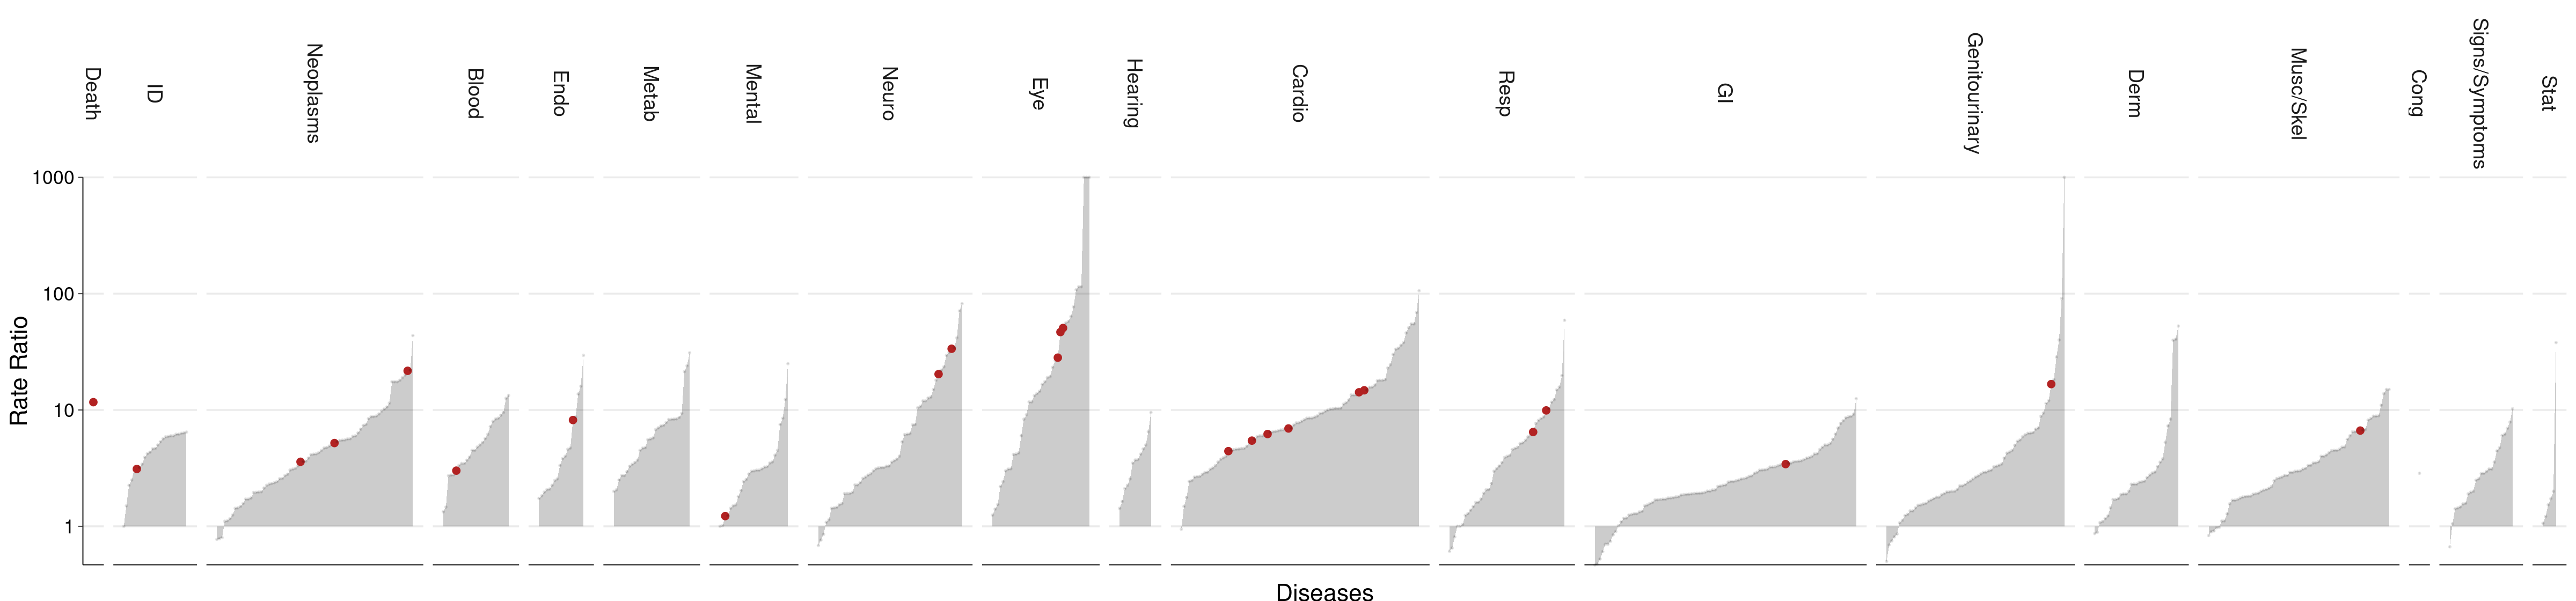

In [23]:
#plot_width = 10; plot_height=2.5; plot_res = 320
#plot_width = 30; plot_height=4; plot_res = 320
plot_width = 15; plot_height=3.5; plot_res = 320

options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp_pos = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp_pos %>% arrange(event_rate_ratio))$endpoint

#index <- temp_pos$ratio < 0
#temp_pos$ratio[index] <- 0.


temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

#index <- temp_pos$log_ratio < 0
#temp_pos$log_ratio[index] <- 0.

overview = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    #geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, log(1000)), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    #scale_x_discrete(expand=expansion(add=2))+
    scale_x_discrete(expand=expansion(add=4))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid(~phecode_category, scales = "free_x") + 
    theme(
        #axis.title.x=element_blank(),
        axis.title.x = element_text(vjust=-2, hjust=.5),
        #axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") +
    labs(x='Diseases')
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [24]:
plot_name = "Figure_2a_UKB_EventRates_PhenomeWide"
overview %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
overview %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/UKB_Figure2a.csv"))